<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/sampling_generate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline

In [19]:
# numpy.random.normal(loc=0.0, scale=1.0, size=None)
# generate sample of 200 values that follow a normal distribution 
# data = normal(loc=0, scale=1, size=200)

data = pd.DataFrame({"zt1" : normal(0, 1, 50000),
                     "zt2" : normal(0, 1, 50000),
                     "zt3" : normal(0, 1, 50000)})
data

,zt1,zt2,zt3
0,3.046508,-0.259727,-0.855826
1,-0.841612,1.867718,-0.302265
2,0.559567,0.319081,-0.785877
3,-0.315517,-0.124940,0.032785
4,0.154754,0.568340,2.705237
...,...,...,...
49995,1.398804,0.388964,-0.031333
49996,-2.755002,1.275882,0.115626
49997,0.069835,-1.072009,0.939808
49998,0.843816,1.220278,-0.154085


In [36]:
n=50
rep=1
table_data_all=pd.DataFrame({"rep":[]})
data_copy=data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:]
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy()
        data_copy=pd.DataFrame({"":[]})
    #=========================
    p = 0

    Zt1 = data_new['zt1']
    Zt2 = data_new['zt2']
    Zt3 = data_new['zt3']

    xt1 = (1-(p**2))**(1/2)*Zt1
    xt2 = (1-(p**2))**(1/2)*Zt2
    xt3 = (1-(p**2))**(1/2)*Zt3

    new_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                             'Xt2' : data_new['zt2'],
                             'Xt3' : data_new['zt3'],
                             'e'   : normal(0, xt2**4, n)})


    table_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                               'Xt2' : data_new['zt2'],
                               'Xt3' : data_new['zt3'],
                               'e'   : new_data['e']})
    table_data['Y'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']+table_data['e']
    #table_data['Y_hat'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']
    table_data['y_pred'] = model.predict(x)
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    # display(table_data)
    rep+=1
    if rep==100:
      break
table_data_all=table_data_all.set_index(["rep","index"])
table_data_all

TypeError: ignored

In [29]:
y = table_data_all['Y']
x = table_data_all[['Xt1', 'Xt2', 'Xt3']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

In [37]:
y_pred = model.predict(x)
y_pred
#print('predicted response:', model.predict(x), sep='\n')

rep   index
1.0   0.0       5.708345
      1.0      -0.655200
      2.0      10.346540
      3.0      -4.048104
      4.0       1.933084
                 ...    
99.0  45.0      2.873631
      46.0     -1.339283
      47.0      1.224772
      48.0      5.914214
      49.0     -0.948355
Length: 4950, dtype: float64

In [ ]:
table_data['e_hat']=table_data['Y']-table_data['y_pred']

In [4]:
table_data_all.mean()

Xt1      0.001134
Xt2     -0.000792
Xt3      0.002589
e       -0.028719
Y        3.979865
Y_hat    4.008585
e_hat   -0.028719
dtype: float64

In [5]:
table_data_all.var()

Xt1       1.002209
Xt2       0.964429
Xt3       1.013063
e        72.634704
Y        87.653291
Y_hat    15.420224
e_hat    72.634704
dtype: float64

In [6]:
# Compute pairwise correlation of columns, excluding NA/null values.
table_data_all.corr()

,Xt1,Xt2,Xt3,e,Y,Y_hat,e_hat
Xt1,1.000000,0.025874,0.002868,-0.008247,0.040445,0.114328,-0.008247
Xt2,0.025874,1.000000,-0.007329,0.004000,0.159252,0.371005,0.004000
Xt3,0.002868,-0.007329,1.000000,-0.007218,0.379422,0.920275,-0.007218
e,-0.008247,0.004000,-0.007218,1.000000,0.907790,-0.006000,1.000000
Y,0.040445,0.159252,0.379422,0.907790,1.000000,0.413969,0.907790
Y_hat,0.114328,0.371005,0.920275,-0.006000,0.413969,1.000000,-0.006000
e_hat,-0.008247,0.004000,-0.007218,1.000000,0.907790,-0.006000,1.000000


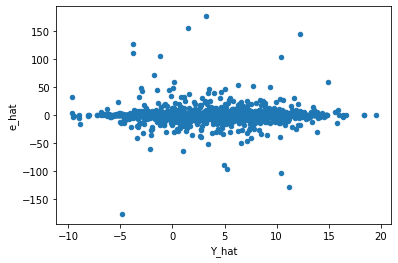

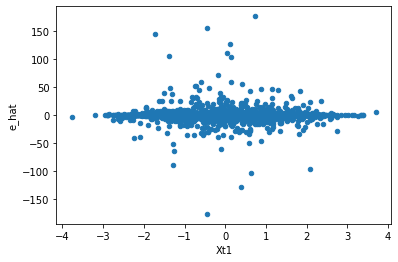

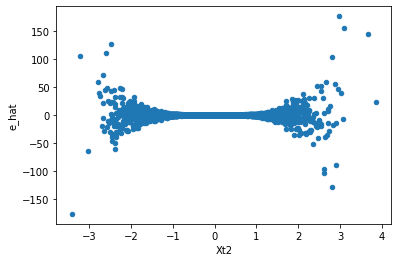

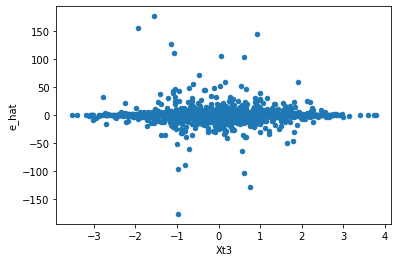

In [7]:
table_data_all.plot(x ='Y_hat', y='e_hat', kind = 'scatter')
table_data_all.plot(x ='Xt1', y='e_hat', kind = 'scatter')
table_data_all.plot(x ='Xt2', y='e_hat', kind = 'scatter')
table_data_all.plot(x ='Xt3', y='e_hat', kind = 'scatter')